## 3. Waste generation prediction

In [1]:
#we call the required functions for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas_datareader as dr
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objects as go
import plotly.express as px

from MC_FP_UsefulFunctions import *

import warnings
warnings.filterwarnings("ignore")

import sys
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline
py.init_notebook_mode(connected=True)

In [2]:
os.chdir(r'/Users/marike/Documents/MARIKE/DATA SCIENCE/Final project/Waste data')

In [3]:
countries_df_model_path = r'CountriesDFforModelling.csv'
countries_waste_model = pd.read_csv(countries_df_model_path)
countries_df_model_allvar_path = r'CountriesDF_model_allvariables.csv'
countries_waste_allvar = pd.read_csv(countries_df_model_allvar_path)

In [4]:
countries_waste_model.head()

,WasteLog,gdp_inhab_log,region
0,6.751218,10.488395,2
1,5.096262,6.427928,5
2,5.129307,8.320424,6
3,5.985874,8.450481,1
4,6.258912,10.603503,1


In [5]:
countries_waste_allvar.head()

,info_system_SW_mgmt,national_waste_agency,national_law_for_SW_mgmt,PPP_rules_and_regulations,compost_percent,recycling_percent,WasteLog,PopLog,gdp_inhab_log,region,income
0,0,1,1,1,0.0,11.0,6.751218,11.544308,10.488395,2,0
1,0,1,1,1,0.0,0.0,5.096262,17.360982,6.427928,5,1
2,0,0,1,1,0.0,0.0,5.129307,17.038225,8.320424,6,2
3,0,1,1,1,0.0,0.0,5.985874,14.873545,8.450481,1,3
4,0,1,1,1,0.0,0.0,6.258912,11.319729,10.603503,1,0


In [6]:
countries_waste_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
WasteLog         215 non-null float64
gdp_inhab_log    215 non-null float64
region           215 non-null int64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


- The dataset does not include time or object.
- There is no null value in dataset.

In [7]:
# We define a seed for reproducibility of random functions
SEED = 12
np.random.seed(SEED)

In [8]:
countries_waste_model.columns

Index(['WasteLog', 'gdp_inhab_log', 'region'], dtype='object')

In [9]:
countries_waste_allvar.columns

Index(['info_system_SW_mgmt', 'national_waste_agency',
       'national_law_for_SW_mgmt', 'PPP_rules_and_regulations',
       'compost_percent', 'recycling_percent', 'WasteLog', 'PopLog',
       'gdp_inhab_log', 'region', 'income'],
      dtype='object')

In [10]:
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score

### Model building: Baseline models = starting point

<img src="https://i.ibb.co/7CXqJmT/validation.png" alt="validation" data-load="full" style="" width="733" height="576">

**LINEAR REGRESSION WITH GDP AND REGION VARIABLES:**

In [11]:
X =  countries_waste_model.drop('WasteLog', axis=1)
y = countries_waste_model.WasteLog

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)


In [12]:
X

,gdp_inhab_log,region
0,10.488395,2
1,6.427928,5
2,8.320424,6
3,8.450481,1
4,10.603503,1
...,...,...
210,8.283431,1
211,6.071638,3
212,9.004981,6
213,7.547702,6


In [13]:
from sklearn.linear_model import LinearRegression
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = mReg.predict(X_test)
y_pred = np.round_(y_pred)

y_predTrain = mReg.predict(X_train)

In [15]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (215, 2)
Shape of the TARGET variable (y): (215,)

Shape of the Train data (X_train): (150, 2)
Shape of the Train data (y_train): (150,)

Shape of the Test data (X_test): (65, 2)
Shape of the Test data (y_test): (65,)


In [16]:
# Performance metrics for TRAIN
MAE_train = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_train = metrics.mean_squared_error(y_train, y_predTrain)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_train = r2_score(y_train, y_predTrain)

# Performance metrics for TEST

MAE_test = metrics.mean_absolute_error(y_test, y_pred)
MSE_test = metrics.mean_squared_error(y_test, y_pred)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_test = r2_score(y_test, y_pred)


print('\nFigures of merit Model for TRAIN set: \n')
print('MAE:', round(MAE_train,3))
print('MSE:', round(MSE_train,3))
print('RMSE:', round(RMSE_train,3))
print('R2:', round(R2_train,3))

print('\nFigures of merit Model for TEST set: \n')
print('MAE:', round(MAE_test,3))
print('MSE:', round(MSE_test,3))
print('RMSE:', round(RMSE_test,3))
print('R2:', round(R2_test,3))


Figures of merit Model for TRAIN set: 

MAE: 0.359
MSE: 0.227
RMSE: 0.477
R2: 0.571

Figures of merit Model for TEST set: 

MAE: 0.378
MSE: 0.275
RMSE: 0.524
R2: 0.297


**LINEAR REGRESSION WITH ONLY GDP VARIABLE:**

In [17]:
X0 = countries_waste_model.drop(['WasteLog','region'], axis=1)
y0 = countries_waste_model.WasteLog

X_train0, X_test0, y_train0, y_test0 =train_test_split(X0,y0,test_size=0.3,random_state=42)


In [18]:
X0

,gdp_inhab_log
0,10.488395
1,6.427928
2,8.320424
3,8.450481
4,10.603503
...,...
210,8.283431
211,6.071638
212,9.004981
213,7.547702


In [19]:
from sklearn.linear_model import LinearRegression
mReg = LinearRegression()
mReg.fit(X_train0, y_train0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred0 = mReg.predict(X_test0)
y_pred0 = np.round_(y_pred0)

y_predTrain0 = mReg.predict(X_train0)

In [21]:
print('Shape of the raw data (X0): {}'.format (X0.shape))
print('Shape of the TARGET variable (y0): {}'.format (y0.shape))

print('\nShape of the Train data (X_train0): {}'.format (X_train0.shape))
print('Shape of the Train data (y_train0): {}'.format (y_train0.shape))

print('\nShape of the Test data (X_test0): {}'.format (X_test0.shape))
print('Shape of the Test data (y_test0): {}'.format (y_test0.shape))

Shape of the raw data (X0): (215, 1)
Shape of the TARGET variable (y0): (215,)

Shape of the Train data (X_train0): (150, 1)
Shape of the Train data (y_train0): (150,)

Shape of the Test data (X_test0): (65, 1)
Shape of the Test data (y_test0): (65,)


In [22]:
# Performance metrics for TRAIN
MAE_train_0 = metrics.mean_absolute_error(y_train0, y_predTrain0)
MSE_train_0 = metrics.mean_squared_error(y_train0, y_predTrain0)
RMSE_train_0 = np.sqrt(metrics.mean_squared_error(y_train0, y_predTrain0))
R2_train_0 = r2_score(y_train0, y_predTrain0)

# Performance metrics for TEST

MAE_test_0 = metrics.mean_absolute_error(y_test0, y_pred0)
MSE_test_0 = metrics.mean_squared_error(y_test0, y_pred0)
RMSE_test_0 = np.sqrt(metrics.mean_squared_error(y_test0, y_pred0))
R2_test_0 = r2_score(y_test0, y_pred0)


print('\nFigures of linear regression Model only with GDP variable for TRAIN set: \n')
print('MAE_0:', round(MAE_train,3))
print('MSE_0:', round(MSE_train,3))
print('RMSE_0:', round(RMSE_train,3))
print('R2_0:', round(R2_train,3))

print('\nFigures of linear regression Model only with GDP variable for TEST set: \n')
print('MAE_0:', round(MAE_test,3))
print('MSE_0:', round(MSE_test,3))
print('RMSE_0:', round(RMSE_test,3))
print('R2_0:', round(R2_test,3))


Figures of linear regression Model only with GDP variable for TRAIN set: 

MAE_0: 0.359
MSE_0: 0.227
RMSE_0: 0.477
R2_0: 0.571

Figures of linear regression Model only with GDP variable for TEST set: 

MAE_0: 0.378
MSE_0: 0.275
RMSE_0: 0.524
R2_0: 0.297


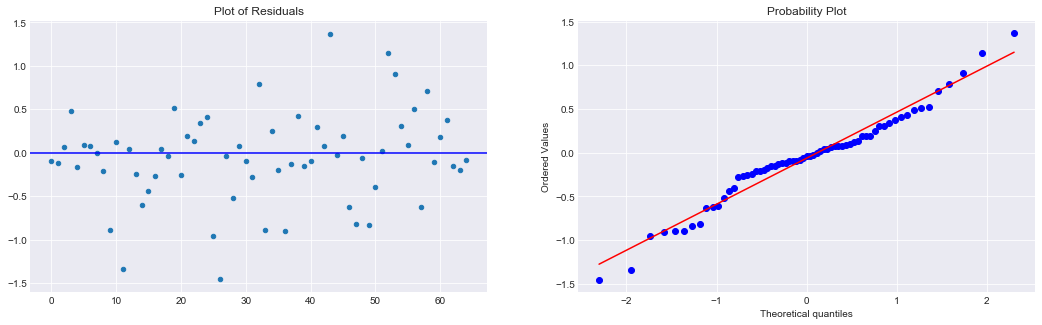

In [23]:
from scipy import stats

# Let's first calculate the residuals
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index(drop=True)
residuals = y_test - y_pred[0]

# Plot the residuals
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)

# Plot the Probability plot
plt.subplot(1,2,2)
plt.title('Probability Plot')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()

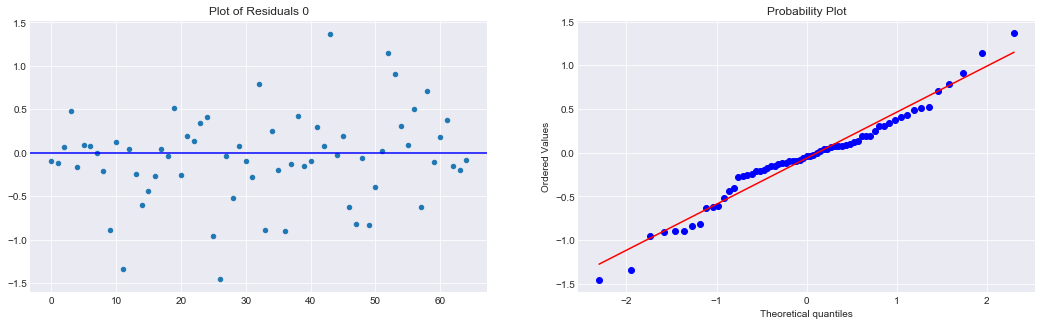

In [24]:
# Let's first calculate the residuals
y_pred0 = pd.DataFrame(y_pred0)
y_test0 = y_test0.reset_index(drop=True)
residuals0 = y_test0 - y_pred0[0]

# Plot the residuals
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals 0')
plt.scatter(residuals.index,residuals, s=20)

# Plot the Probability plot
plt.subplot(1,2,2)
plt.title('Probability Plot 0')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()